$\textbf{Excersise E}$

In [9]:
#Given
import numpy as np
import matplotlib.pyplot as plt
from Formulas import f
#Propeller Properties
span_prop = 11.4
S_prop = 19.2
mass_prop = 2359
e = 0.9
eff_prop = 0.83
P_A = 2*186*1000 # N

CD_0 = 0.025
CL_M = 1.16



1) For the propeller aircraft, plot the velocity hodograph at Sea Level, 10 000 ft and 20 000 ft (ISA) at max power.

For fligt level:0,Max rate of climb 10.13, Max Climbangle: 31.45
For fligt level:10000,Max rate of climb 3.36, Max Climbangle: 4.80
For fligt level:20000,Max rate of climb -0.31, Max Climbangle: -0.85


c:\Users\sarme\OneDrive\Documenten\GitHub\Aircraft-Performance-Formulas-plus-Excersises\Formulas.py:101: RuntimeWarning: invalid value encountered in sqrt
  V_hor = np.sqrt(v**2 - R_C**2)
c:\Users\sarme\OneDrive\Documenten\GitHub\Aircraft-Performance-Formulas-plus-Excersises\Formulas.py:102: RuntimeWarning: invalid value encountered in arcsin
  gamma = np.rad2deg(np.asin(R_C/v))


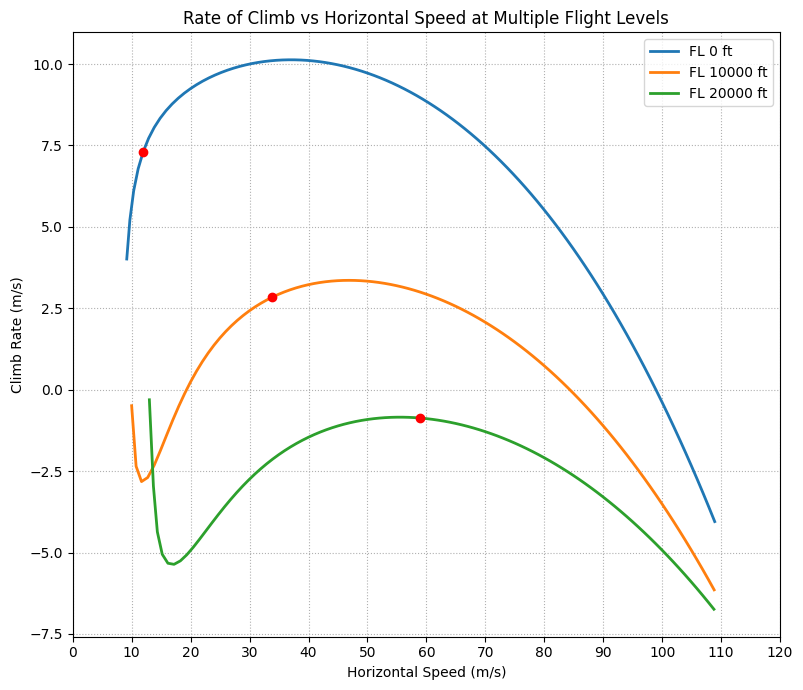

In [10]:
FL = [0, 10000 , 20000] #In feet
R_C_L = []
idx = []
V_HOR = []
V_Stall =[]
Gamma2l = []
AR_p = f.AR_Calc(span_prop,S_prop)
k = f.Induced_Drag_Factor_Calc(AR_p,e)
V_Range = np.arange(10,110,1)
for i in FL:
    P_FL0,T_FL0,Rho_FL0 =f.get_atmosphere_properties(i,'ft')
    #First Iteration gam =0
    
    P_A_E = P_A* (Rho_FL0 / 1.225)**2
    Thrust_A = (P_A_E*eff_prop)/V_Range

    Cl_prop = f.V_To_CL_Calc(mass_prop,V_Range,Rho_FL0,S_prop)
    Cd_prop = f.Cd_Calc(CD_0,k,Cl_prop)

    R_C, _, Gamma1 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,0,Rho_FL0,S_prop)

    
    R_C, V_hor2, Gamma2 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,Gamma1,Rho_FL0,S_prop)

    R_C_L.append(R_C)
    V_HOR.append(V_hor2)
    idx.append(np.nanargmax(Gamma2))

    Gamma2l.append(Gamma2)

    v_stall = f.V_Stall_In_Climb(mass_prop*9.81,Gamma2,Rho_FL0,S_prop,CL_M)
    V_Stall.append(v_stall)

plt.figure(figsize=(8,7))

for j, fl in enumerate(FL):

    plt.plot(V_HOR[j], R_C_L[j], linewidth=2, label=f"FL {fl} ft")
    plt.plot(V_HOR[j][idx[j]], R_C_L[j][idx[j]], "o", color="red")
    print(f"For fligt level:{fl},Max rate of climb {np.nanmax(R_C_L[j]):.2f}, Max Climbangle: {np.nanmax(Gamma2l[j]):.2f}")
plt.xlabel("Horizontal Speed (m/s)")
plt.ylabel("Climb Rate (m/s)")
plt.title("Rate of Climb vs Horizontal Speed at Multiple Flight Levels")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
xmin, xmax = plt.xlim()
plt.xticks(np.arange(np.floor(xmin/10)*10, np.ceil(xmax/10)*10 + 1, 10))

plt.show()